# **KNN CLASSIFIER V/S SVM CLASSIFIER**

## **Import Necessary Libraries**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer, Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## **THE FOLLOWING CODE IS COPIED FROM UC IRVINE BREAST CANCER WISCONSIN DIAGNOSTIC REPOSITORY TO IMPORT THE DATASET**

In [0]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

if 'ID' in X.columns:
    X = X.drop('ID', axis=0)


### **CHECK FOR ANY NULL VALUES**

In [0]:
print(X.isnull().sum())

### **HISTOGRAMS OF THE PREDICTORS TO CHECK FOR SKEWNESS**

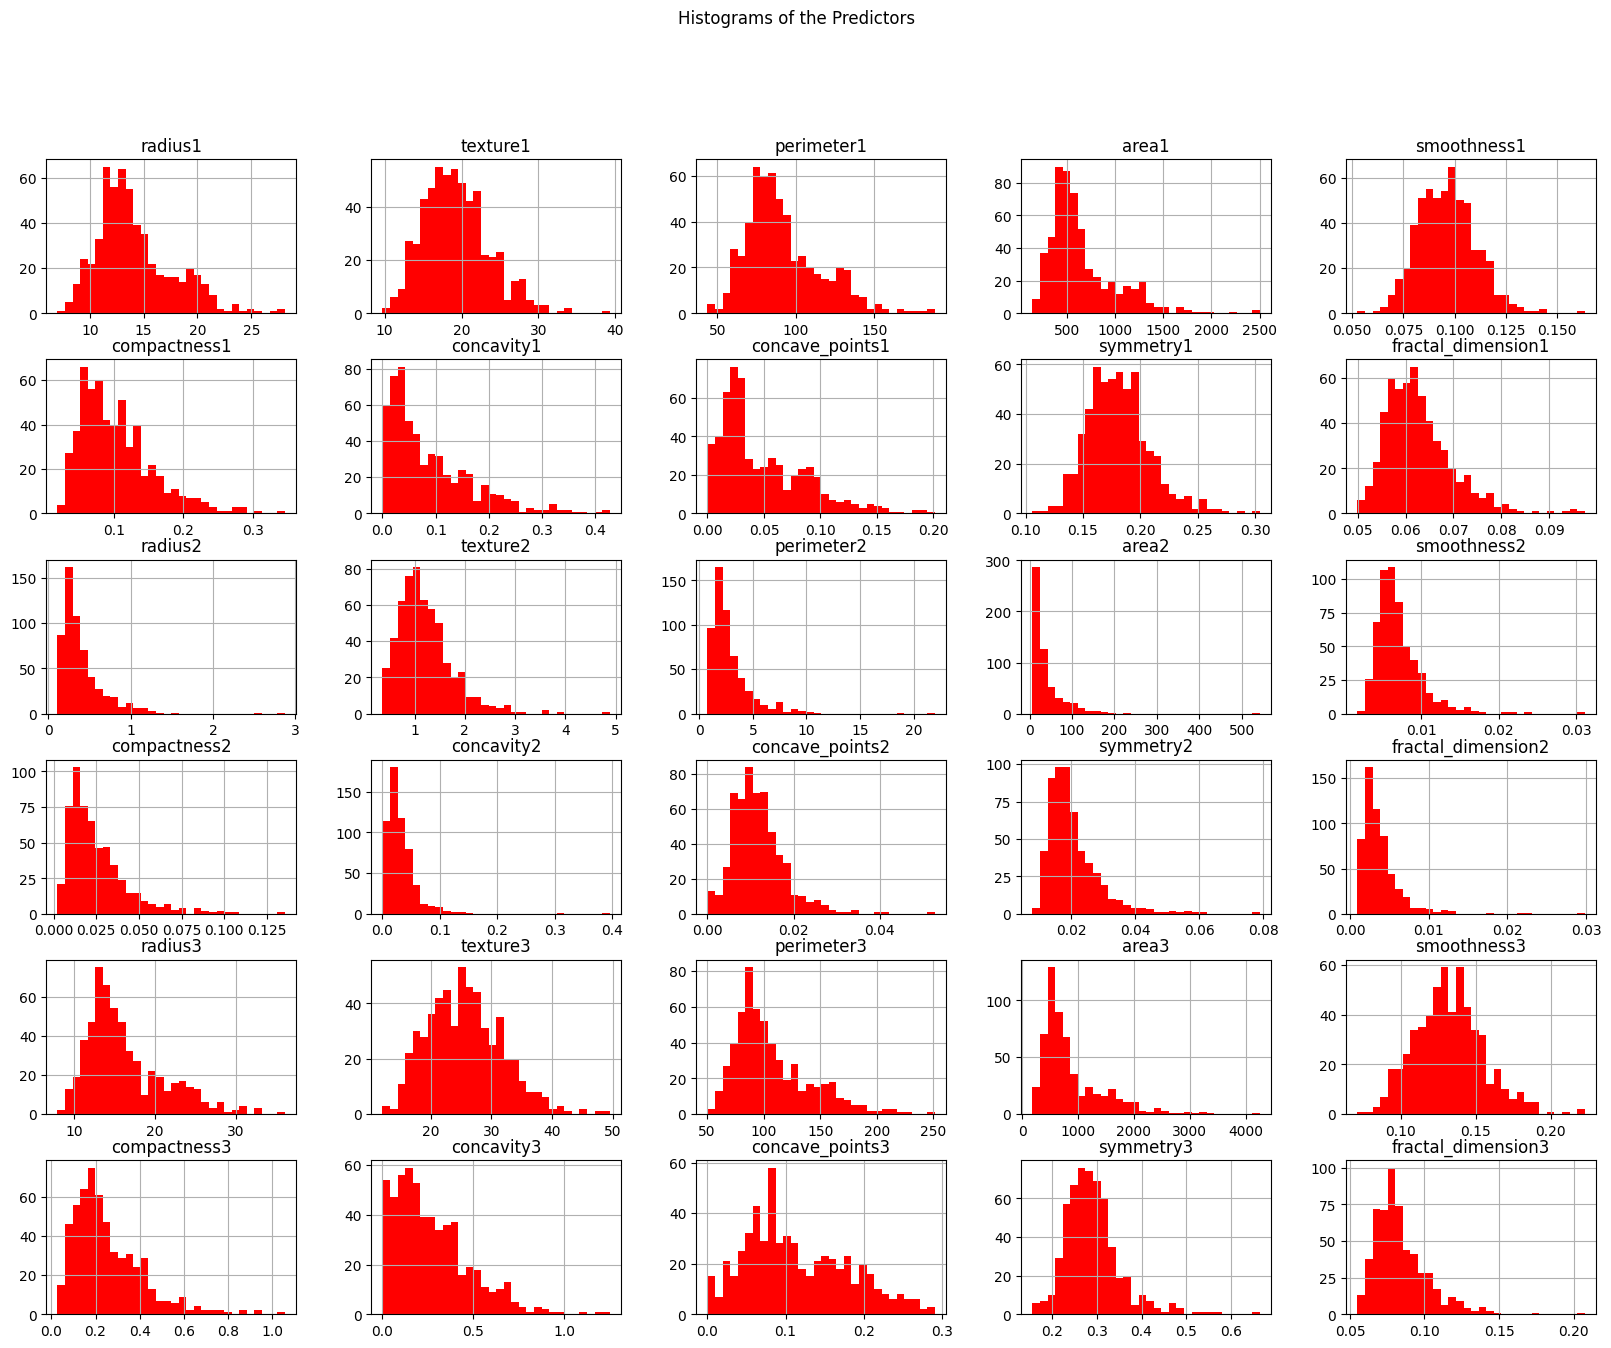

In [0]:
#Histograms of the predictor variables

X.hist(bins = 30, figsize=(20,15), color='red')
plt.suptitle('Histograms of the Predictors')
plt.show()

### **BOXPLOTS TO CHECK FOR OUTLIERS**

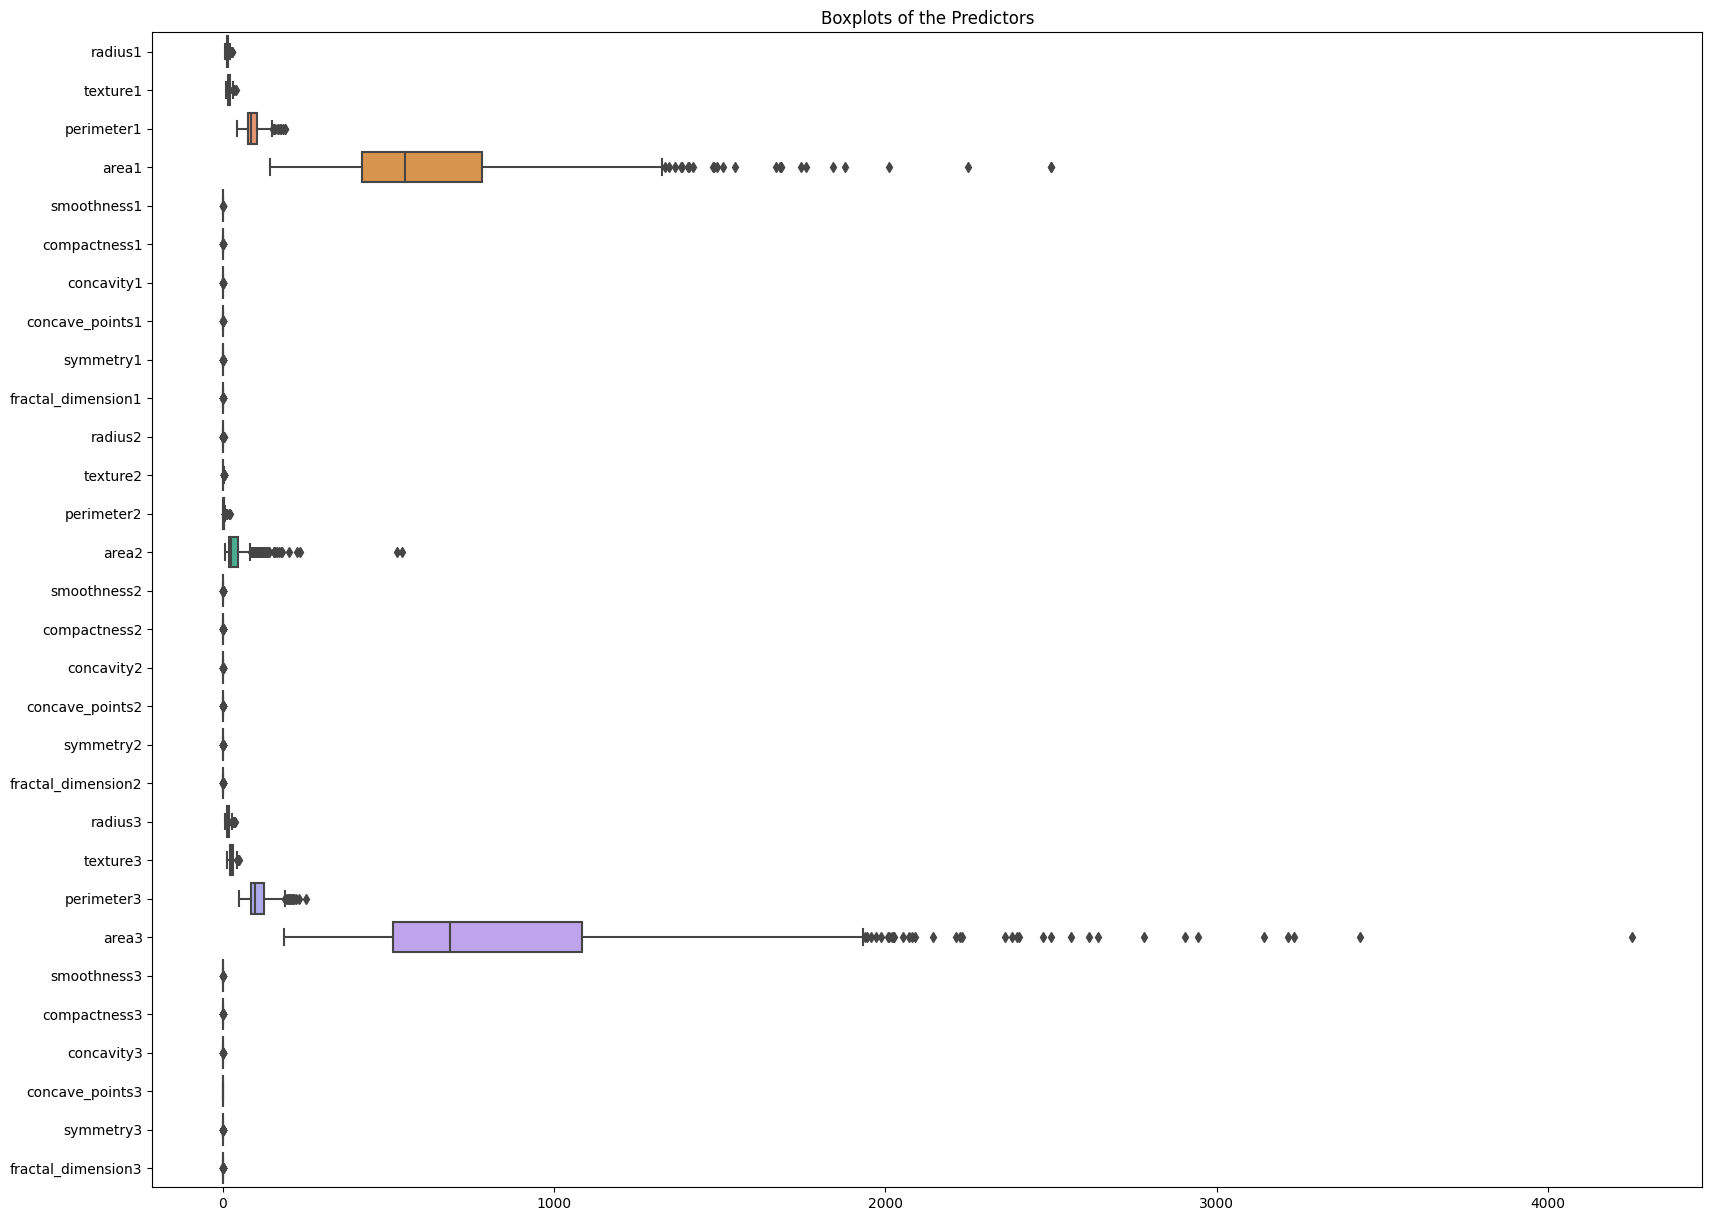

In [0]:
#Boxplots for outliers
#plt.figure(figsize=(30,20))
plt.figure(figsize=(20,15))
sns.boxplot(data=X, orient='h')
plt.title('Boxplots of the Predictors')
plt.show()

### **SPLIT THE TARGET AND PREDICTOR VARIABLES INTO TRAIN AND TEST SETS**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=96)

### **CREATE A FUNCTION TO DO TRANSFORMATIONS, TRAIN AND TEST THE MODELS**

In [0]:
def train_and_test_models(name, model, tuning_grid, pred_train, pred_test, tgt_train, tgt_test):

    model_pipeline = Pipeline([
        ('yeo_johnson', PowerTransformer(method='yeo-johnson')),
        ('spatial', Normalizer(norm='l2')),
        (name, model)
    ])
    model_grid_search = GridSearchCV(model_pipeline, tuning_grid, cv=5, scoring='accuracy', n_jobs=-1)
    model_grid_search.fit(pred_train, tgt_train)

    model_predictions = model_grid_search.predict(pred_test)
    
    display(f"{name} results")

    display("The accuracy is:", accuracy_score(tgt_test, model_predictions))

    display("The Precision is:", precision_score(tgt_test, model_predictions, pos_label='M'))

    display("The Recall is:",recall_score(tgt_test, model_predictions, pos_label='M'))

    display("The F1 Score is:", f1_score(tgt_test, model_predictions, pos_label='M'))

    


# **KNN MODEL**

### **KNN tuning grid**

In [0]:
knn_param_grid = {
    'knn__n_neighbors': [2, 4, 6, 8, 10, 12],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2] 
}

### **Train and test KNN Model**

In [0]:
train_and_test_models("knn",KNeighborsClassifier(), knn_param_grid, X_train, X_test, y_train, y_test)

'knn results'

'The accuracy is:'

0.956140350877193

'The Precision is:'

0.9787234042553191

'The Recall is:'

0.92

'The F1 Score is:'

0.9484536082474226

# **SUPPORT VECTOR MACHINES MODEL**

### **SVM Tuning Grid**

In [0]:
svm_param_grid = {'svm__C': [0.1, 1, 10, 100, 1000],  
              'svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'svm__kernel': ['rbf']} 

### **Train and Test the SVM Model**

In [0]:
train_and_test_models("svm", SVC(), svm_param_grid, X_train, X_test, y_train, y_test)

'svm results'

'The accuracy is:'

0.9649122807017544

'The Precision is:'

0.9791666666666666

'The Recall is:'

0.94

'The F1 Score is:'

0.9591836734693877